In [2]:
%load_ext autoreload
%autoreload 2

总面积:  156.0
k分划分法-->k = 2
k分划分法-->k = 3
k分划分法-->k = 4
k分划分法-->k = 5
k分划分法-->k = 6
初始的排列：[8 7 6 9 2 3 1 4 5]，初始的区带：[0. 0. 1. 0. 1. 0. 1. 1. 1.]，设施布局为：[[8, 7, 6], [9, 2], [3, 1], [4], [5]]


e:\Chris\Anaconda3\envs\gym-flp-new\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (2, 9)
  logger.warn(
e:\Chris\Anaconda3\envs\gym-flp-new\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (9, 9)
  logger.warn(
e:\Chris\Anaconda3\envs\gym-flp-new\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use

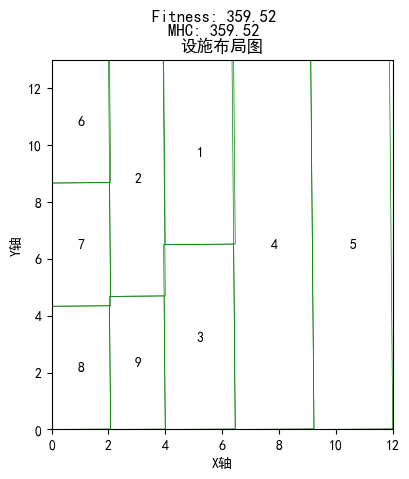

2024-10-19 15:06:35,122 - INFO - 执行单一区代Shuffle
2024-10-19 15:06:35,122 - DEBUG - 变换前的排列：[8 7 6 9 2 3 1 4 5]，变换前的区带：[0. 0. 1. 0. 1. 0. 1. 1. 1.], 设施布局为：[array([8, 7, 6]), array([9, 2]), array([3, 1]), array([4]), array([5])]
2024-10-19 15:06:35,123 - DEBUG - 变换后的排列：[8 7 6 9 2 3 1 4 5]，变换后的区带：[0 0 1 0 1 0 1 1 1], 设施布局为：[array([8, 7, 6]), array([9, 2]), array([3, 1]), array([4]), array([5])]


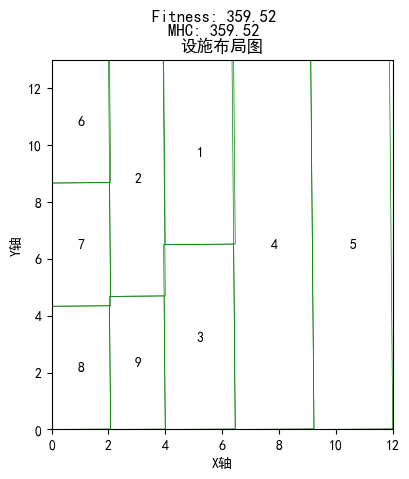

2024-10-19 15:06:35,200 - DEBUG - 变换前的排列：[8 7 6 9 2 3 1 4 5]，变换前的区带：[0. 0. 1. 0. 1. 0. 1. 1. 1.], 设施布局为：[array([8, 7, 6]), array([9, 2]), array([3, 1]), array([4]), array([5])]
2024-10-19 15:06:35,201 - DEBUG - 变换后的排列：[3 7 6 9 2 8 1 4 5]，变换后的区带：[0. 0. 1. 0. 1. 0. 1. 1. 1.], 设施布局为：[array([3, 7, 6]), array([9, 2]), array([8, 1]), array([4]), array([5])]


变动后的排列：[8 7 6 9 2 3 1 4 5]，变动后的区带：[0 0 1 0 1 0 1 1 1]，设施布局为：[[8, 7, 6], [9, 2], [3, 1], [4], [5]]
执行设施交换


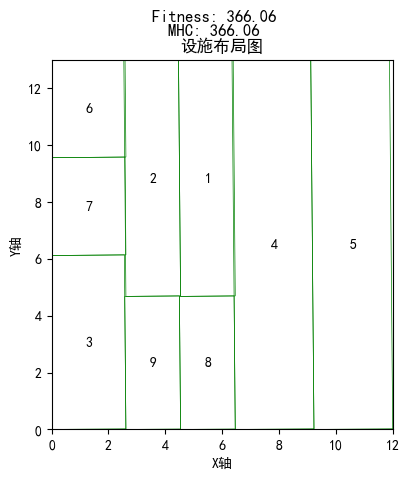

2024-10-19 15:06:35,287 - DEBUG - 变换前的排列：[3 7 6 9 2 8 1 4 5]，变换前的区带：[0. 0. 1. 0. 1. 0. 1. 1. 1.], 设施布局为：[array([3, 7, 6]), array([9, 2]), array([8, 1]), array([4]), array([5])]
2024-10-19 15:06:35,288 - DEBUG - 变换后的排列：[3 7 6 9 2 8 1 4 5]，变换后的区带：[0. 0. 0. 0. 1. 0. 1. 1. 1.], 设施布局为：[array([3, 7, 6, 9, 2]), array([8, 1]), array([4]), array([5])]


变动后的排列：[3 7 6 9 2 8 1 4 5]，变动后的区带：[0. 0. 1. 0. 1. 0. 1. 1. 1.]，设施布局为：[[3, 7, 6], [9, 2], [8, 1], [4], [5]]
执行区带反转


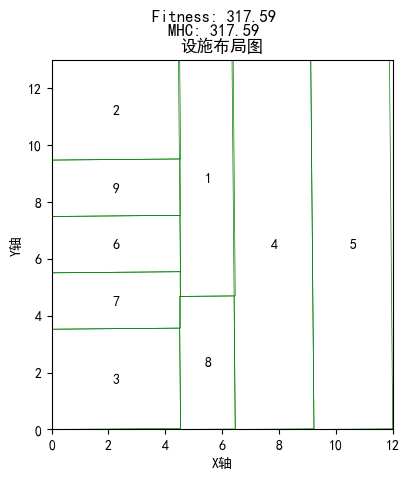

2024-10-19 15:06:35,368 - DEBUG - 变换前的排列：[3 7 6 9 2 8 1 4 5]，变换前的区带：[0. 0. 0. 0. 1. 0. 1. 1. 1.], 设施布局为：[array([3, 7, 6, 9, 2]), array([8, 1]), array([4]), array([5])]
2024-10-19 15:06:35,369 - DEBUG - 变换后的排列：[8 1 3 7 6 9 2 4 5]，变换后的区带：[0 1 0 0 0 0 1 1 1], 设施布局为：[array([8, 1]), array([3, 7, 6, 9, 2]), array([4]), array([5])]


变动后的排列：[3 7 6 9 2 8 1 4 5]，变动后的区带：[0. 0. 0. 0. 1. 0. 1. 1. 1.]，设施布局为：[[3, 7, 6, 9, 2], [8, 1], [4], [5]]
执行区带交换


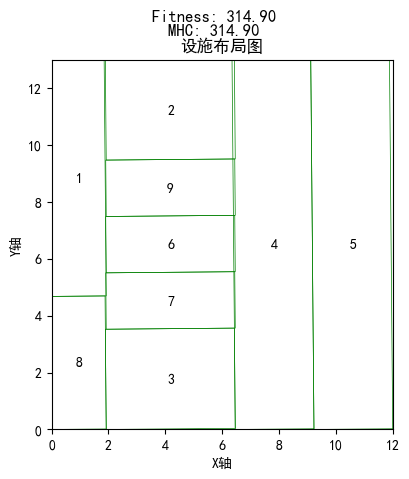

变动后的排列：[8 1 3 7 6 9 2 4 5]，变动后的区带：[0 1 0 0 0 0 1 1 1]，设施布局为：[[8, 1], [3, 7, 6, 9, 2], [4], [5]]


In [4]:
# 动作空间测试
import gym
import FbsEnv
import matplotlib.pyplot as plt
import numpy as np
import torch
from stable_baselines3 import DQN
import FbsEnv.utils.FBSUtil as FBSUtil
import logging


instance = "O9-maoyan"
env = gym.make("FbsEnv-v0", instance=instance)
env.reset()
init_permutation = env.permutation
init_bay = env.bay
permutation = init_permutation
bay = init_bay
fac_list_array = FBSUtil.permutationToArray(permutation, bay)
fac_list = [list_item.tolist() for list_item in fac_list_array]
print(f"初始的排列：{init_permutation}，初始的区带：{init_bay}，设施布局为：{fac_list}")
env.render()
# --------------------------------------------单一区代动作--------------------------------------------
logging.info(f"执行单一区代Shuffle")
permutation, bay = FBSUtil.shuffle_single(env.permutation, env.bay)
env.reset(layout=(permutation, bay))
fac_list_array = FBSUtil.permutationToArray(permutation, bay)
fac_list = [list_item.tolist() for list_item in fac_list_array]
env.render()
print(f"变动后的排列：{permutation}，变动后的区带：{bay}，设施布局为：{fac_list}")
env.reset(layout=(init_permutation, init_bay))  # 将布局恢复初始化
# --------------------------------------------执行设施交换--------------------------------------------
print(f"执行设施交换")
permutation, bay = FBSUtil.facility_swap(env.permutation, env.bay)
env.reset(layout=(permutation, bay))
fac_list_array = FBSUtil.permutationToArray(permutation, bay)
fac_list = [list_item.tolist() for list_item in fac_list_array]
env.render()
print(f"变动后的排列：{permutation}，变动后的区带：{bay}，设施布局为：{fac_list}")
env.reset(layout=(init_permutation, init_bay))  # 将布局恢复初始化
# --------------------------------------------执行区带反转--------------------------------------------
print(f"执行区带反转")
permutation, bay = FBSUtil.bay_flip(env.permutation, env.bay)
env.reset(layout=(permutation, bay))
fac_list_array = FBSUtil.permutationToArray(permutation, bay)
fac_list = [list_item.tolist() for list_item in fac_list_array]
env.render()

print(f"变动后的排列：{permutation}，变动后的区带：{bay}，设施布局为：{fac_list}")
env.reset(layout=(init_permutation, init_bay))  # 将布局恢复初始化
# --------------------------------------------执行区带交换--------------------------------------------
print(f"执行区带交换")
permutation, bay = FBSUtil.bay_swap(env.permutation, env.bay)
env.reset(layout=(permutation, bay))
fac_list_array = FBSUtil.permutationToArray(permutation, bay)
fac_list = [list_item.tolist() for list_item in fac_list_array]
env.render()

print(f"变动后的排列：{permutation}，变动后的区带：{bay}，设施布局为：{fac_list}")
env.reset(layout=(init_permutation, init_bay))  # 将布局恢复初始化
# --------------------------------------------执行区带交换--------------------------------------------

env.close()